### Student Information
Name:羅心

Student ID:108062306

GitHub ID: losh0427

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

---

## Begin Assignment Here

###  Second

1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration

Import

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import sys
from sklearn.datasets import load_files
sys.path.append('..') 
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#straightly use pandas to read the data and become the dataframe
file_path = ['sentiment_labelled_sentences/amazon_cells_labelled.txt', 
             'sentiment_labelled_sentences/imdb_labelled.txt', 
             'sentiment_labelled_sentences/yelp_labelled.txt']
provider = ['amazon', 'imdb', 'yelp']
columns = ['sentence', 'score', 'provider']
file_path_amazon = 'sentiment_labelled_sentences/amazon_cells_labelled.txt'
file_path_imdb = 'sentiment_labelled_sentences/imdb_labelled.txt'
file_path_yelp = 'sentiment_labelled_sentences/yelp_labelled.txt'
df = []
for i in range(len(file_path)):
    df.append(pd.read_csv(file_path[i], delimiter= '\t', header=None, quotechar='\''))
    df[i]['provider'] = provider[i]
    df[i].columns = columns
X = pd.concat(df, ignore_index=True)

#random all and drop the duplicates and the missing values
X = X.sample(n=3000 , random_state=42,replace=False )
X.dropna(inplace=True)
X.drop_duplicates(inplace=True)



<Axes: title={'center': 'Category distribution'}>

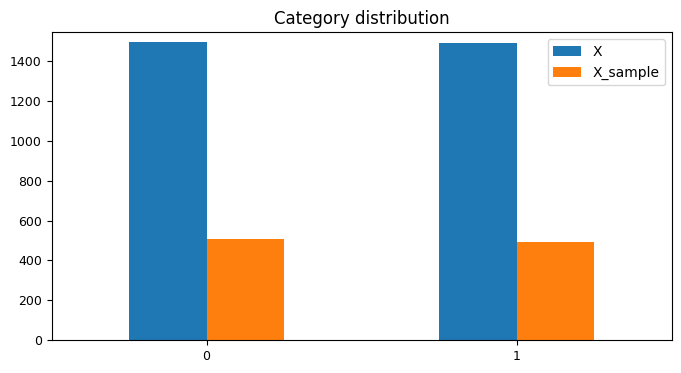

In [4]:
#sampling (X_sample)
X_sample = X.sample(n=1000, random_state=42,replace=False)
#count num of score 1 and 0 (X and X_smaple)
max_num = max(max(X.score.value_counts()), max(X_sample.score.value_counts()))  + 50
pd.concat([ X.score.value_counts().rename('X'),X_sample.score.value_counts().rename('X_sample')], axis=1).rename_axis('').plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max_num],        
                                    rot = 0, fontsize = 9, figsize = (8,4))



,term_avoid,term_at,term_all,term_costs
doc_1801,1,1,1,1


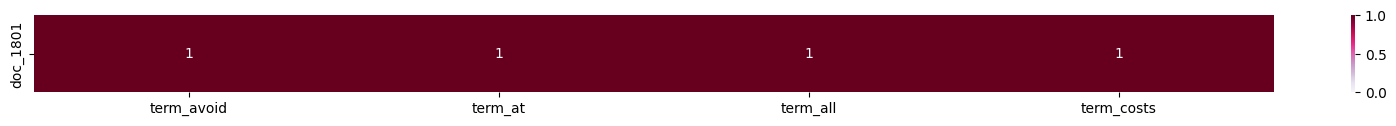

In [5]:
#create term frequency matrix 
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X.sentence)

#plot(visalize) the term frequency matrix
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[X_count[0].nonzero()[1]]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:1]]
plot_z = X_count[0, X_count[0].nonzero()[1]].toarray() #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(20, 1))
max_num = np.max(X_count[0, X_count[0].nonzero()[1]])
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_num, annot=True)




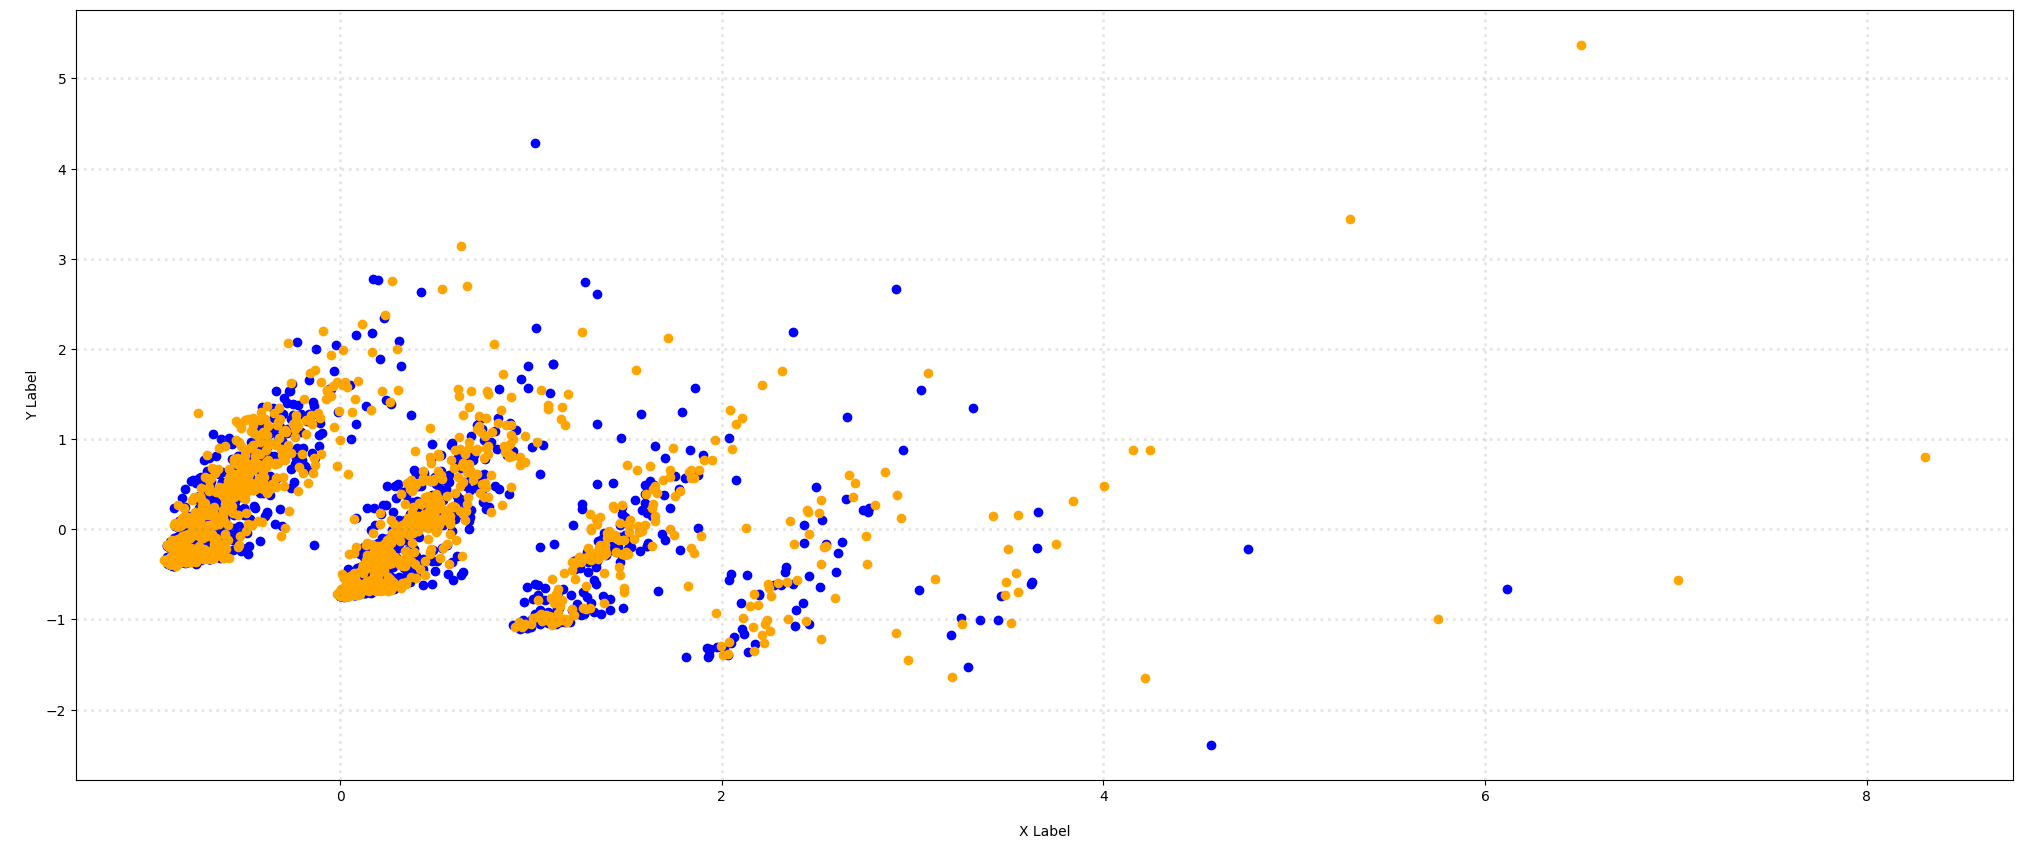

In [6]:
#PCA
X_reduced = PCA(n_components = 2).fit_transform(X_count.toarray())
#plot the PCA result
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(['blue', 'orange'], [0,1]):
    xs = X_reduced[X['score'] == score].T[0]
    ys = X_reduced[X['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


[ 1 36  3 ...  1  2  1]
(5155,)


C:\Users\lo\AppData\Local\Temp\ipykernel_13540\3575760397.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);
C:\Users\lo\AppData\Local\Temp\ipykernel_13540\3575760397.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


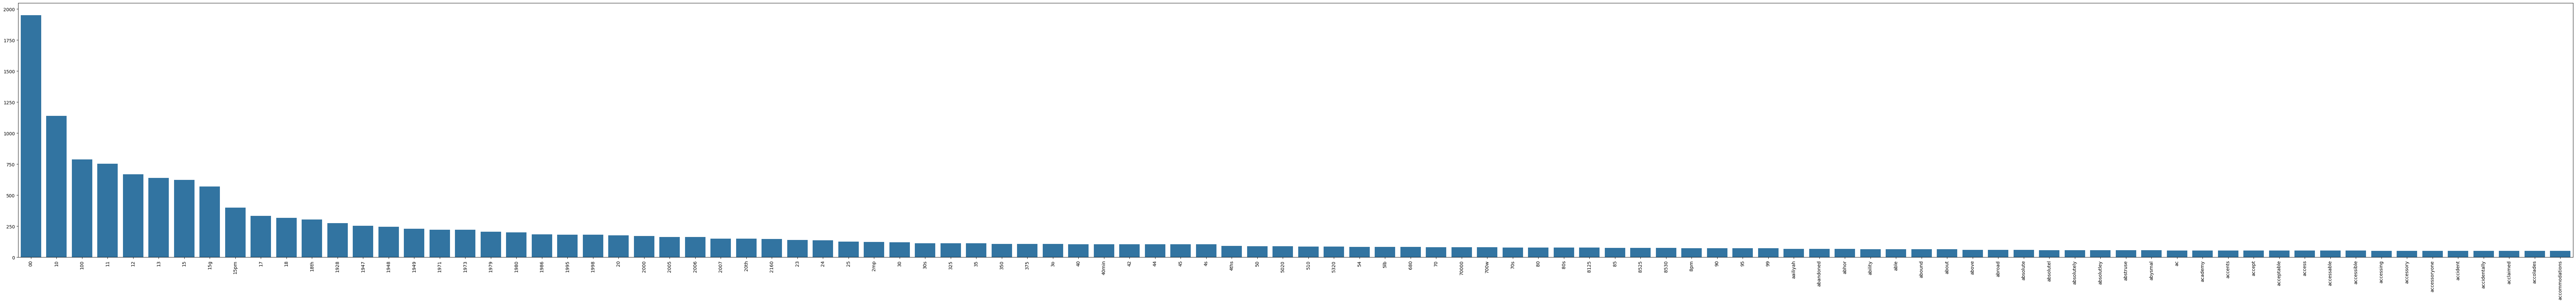

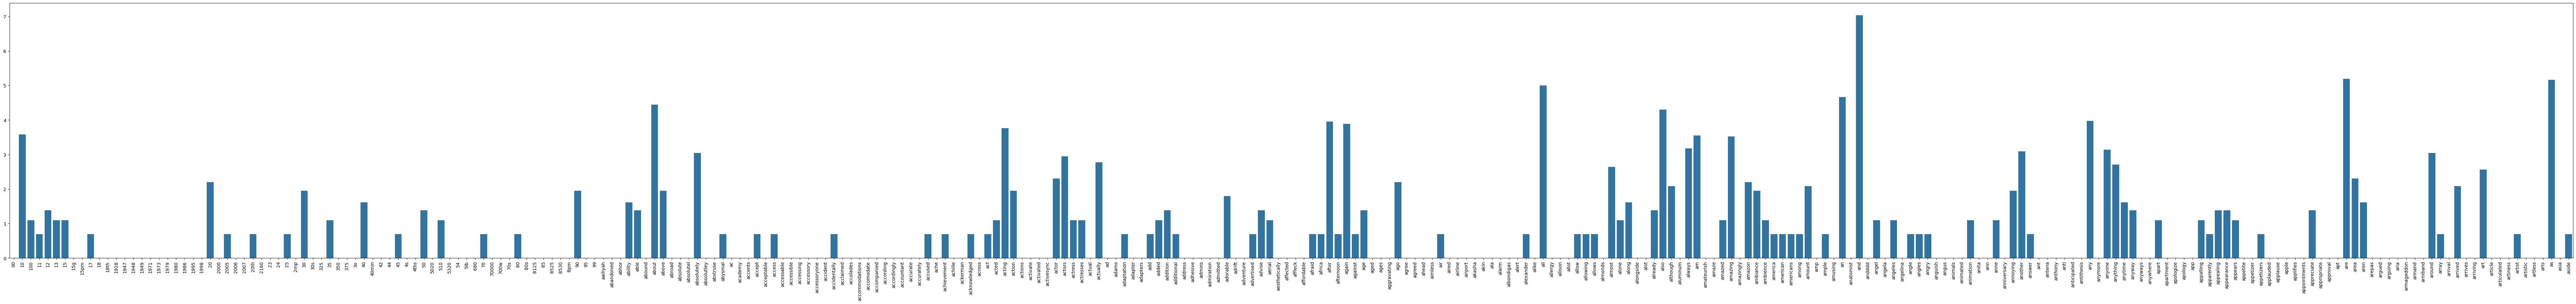

In [7]:
#feature aggregation
term_frequencies = []
term_frequencies = np.asarray(X_count.sum(axis=0))[0]
print(term_frequencies) #sum of first term: 00
print(term_frequencies.shape)
#plot the feature aggregation result
term_index = list(range(X_count.shape[1]))
term_frequencies_index = np.array([term_frequencies , term_index]).T
sort_index = np.argsort(term_frequencies_index[:, 0])
term_frequencies_index = term_frequencies_index[sort_index][::-1]

#sorted term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[term_frequencies_index[:100,1]], 
            y=term_frequencies_index[:100,0])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

#logarithm of term frequencies
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);




In [8]:
#discretization and binarization
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)
X['bin_score'] = mlb.transform(X['score']).tolist()
display(X[0:9])

,sentence,score,provider,unigrams,bin_score
1801,Avoid at ALL costs!,0,imdb,"[Avoid, at, ALL, costs, !]",[0]
1190,"Garbo, who showed right off the bat that her t...",1,imdb,"[Garbo, ,, who, showed, right, off, the, bat, ...",[1]
1817,You will leave the theater wanting to go out a...,1,imdb,"[You, will, leave, the, theater, wanting, to, ...",[1]
251,O my gosh the best phone I have ever had.,1,amazon,"[O, my, gosh, the, best, phone, I, have, ever,...",[1]
2505,I would not recommend this place.,0,yelp,"[I, would, not, recommend, this, place, .]",[0]
1117,Then scene where they debated whether or not t...,0,imdb,"[Then, scene, where, they, debated, whether, o...",[0]
1411,Her role was played well.,1,imdb,"[Her, role, was, played, well, .]",[1]
2113,"Nice, spicy and tender.",1,yelp,"[Nice, ,, spicy, and, tender, .]",[1]
408,Plantronics Bluetooth Excelent Buy.,1,amazon,"[Plantronics, Bluetooth, Excelent, Buy, .]",[1]


In [9]:
#plot the discretization and binarization result
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

#show cosine similarity
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.074536
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\lo\AppData\Local\Temp\ipykernel_13540\4025890033.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\lo\AppData\Local\Temp\ipykernel_13540\4025890033.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\lo\AppData\Local\Temp\ipykernel_13540\4025890033.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation.

### Third
1. new data visualiztion : 

I want to show the most 30 term freqencies in both score0 and score1 together(discard the same terms be picked, so it may less than or equal to 60 terms), so we can see some term in both is be used a lot and some just score0 or score1 use a lot.

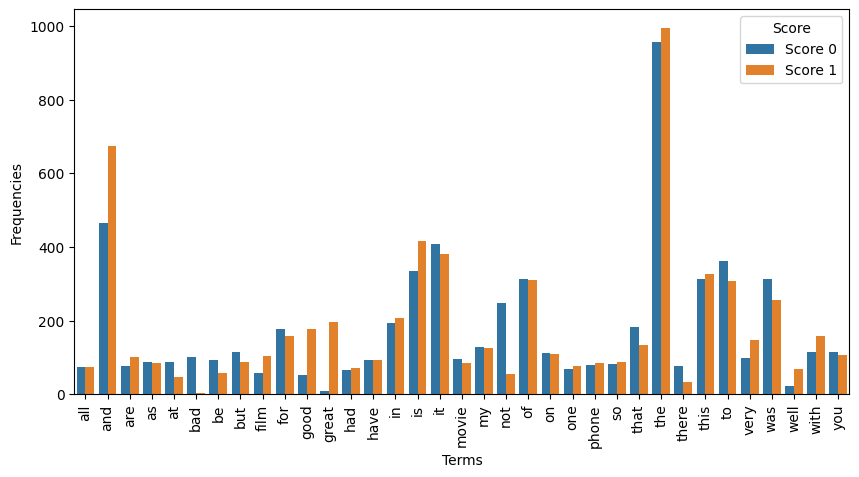

In [21]:
#count the term frequency of score 1 and 0
X_count = count_vect.fit_transform(X.sentence)
term_frequencies_1 = np.zeros(term_frequencies.shape).astype(int)
term_frequencies_0 = np.zeros(term_frequencies.shape).astype(int)
for i in range(0,X_count.shape[0]):
    if X.iloc[i,1] == 1:
        for j in X_count[i].nonzero()[1]:
            term_frequencies_1[j] += X_count[i,j]
    else:
        for j in X_count[i].nonzero()[1]:
            term_frequencies_0[j] += X_count[i,j]
#sort the term frequency of score 1 and 0
term_index = list(range(X_count.shape[1]))
term_frequencies_index_1 = np.array([term_frequencies_1 , term_index]).T
sort_index_1 = np.argsort(term_frequencies_index_1[:, 0])
term_frequencies_index_1 = term_frequencies_index_1[sort_index_1][::-1]
term_frequencies_index_0 = np.array([term_frequencies_0 , term_index]).T
sort_index_0 = np.argsort(term_frequencies_index_0[:, 0])   
term_frequencies_index_0 = term_frequencies_index_0[sort_index_0][::-1]
#choose the top 30 frequency terms in both score 1 and 0
num = 30
need_index = np.array([term_frequencies_index_1[:num,1],term_frequencies_index_0[:num,1]])
need_index = need_index.flatten()
need_index = np.unique(need_index)
need_index = need_index.tolist()
need_index.sort()
need_index = np.array(need_index)
#plot the top 30 frequency terms in both score 1 and 0
data0 = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[need_index],
    'Frequencies':  list(term_frequencies_0[need_index]),
    'Score':  ['Score 0'] * len(need_index)
})
data1 = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[need_index],
    'Frequencies': list(term_frequencies_1[need_index]) ,
    'Score': ['Score 1'] * len(need_index) 
})
data = pd.concat([data0, data1], ignore_index=True)
plt.figure(figsize=(10, 5))
g = sns.barplot(x='Terms', y='Frequencies', hue='Score', data=data)
plt.xticks(rotation=90)

plt.show()


2. TF-IDF feature

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X.iloc[:,0])

print(tfidf_matrix)

  (0, 1036)	0.6359999533789596
  (0, 179)	0.36789514343198565
  (0, 314)	0.37193226970511156
  (0, 345)	0.5672949933615878
  (1, 4538)	0.14126304503866235
  (1, 4307)	0.2249633078230076
  (1, 416)	0.1086000021786416
  (1, 3957)	0.1910405807004359
  (1, 1345)	0.15255183238752085
  (1, 3024)	0.2249633078230076
  (1, 637)	0.10012794270218224
  (1, 5091)	0.1347327796561031
  (1, 3097)	0.07326729441260807
  (1, 4176)	0.1357175546696726
  (1, 3954)	0.14126304503866235
  (1, 4609)	0.14390179367446268
  (1, 4955)	0.18138241942095287
  (1, 1558)	0.20619404080823003
  (1, 4077)	0.41238808161646007
  (1, 1883)	0.11930441029932753
  (1, 3180)	0.14595495361726366
  (1, 707)	0.21398399045334024
  (1, 1040)	0.1357175546696726
  (1, 4468)	0.2249633078230076
  (1, 2157)	0.3110175333622583
  :	:
  (2980, 5107)	0.12935134201730727
  (2980, 216)	0.12250511951444285
  (2980, 3166)	0.12837582915378717
  (2980, 416)	0.11409989180891479
  (2980, 4609)	0.07559474567208682
  (2980, 4529)	0.09476981010008094
  (

3. Naive Bayes classifier

In [95]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#show the accuracy of TF-IDF and frequency features in different test size (0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8)
labels = X.iloc[:,1]
ac_for_tf = []
ac_for_freq = []
for i in np.arange(0.2, 0.9, 0.1):
    i = round(i*10, 1)/10
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=i, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ac_for_tf.append(accuracy)
    print(f"Accuracy for TF-IDF features in test size {i}:    {accuracy}")

print("---------------------------------------------")
for i in np.arange(0.2, 0.9, 0.1):
    i = round(i*10, 1)/10
    X_train, X_test, y_train, y_test = train_test_split(X_count, labels, test_size=i, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ac_for_freq.append(accuracy)
    print(f"Accuracy for frequency features in test size {i}: {accuracy}")
print("---------------------------------------------")
for i in np.arange(0.2, 0.9, 0.1):
    i = round(i*10, 1)/10
    print(f"Accuracy difference (TF-IDF - frequency ) in test size {i}: {ac_for_tf[int(i*10-2)] - ac_for_freq[int(i*10-2)]}")
print("---------------------------------------------")
print("Conculsion: TF-IDF is better than frequency features in most of the test size.")

Accuracy for TF-IDF features in test size 0.2:    0.830820770519263
Accuracy for TF-IDF features in test size 0.3:    0.8335195530726257
Accuracy for TF-IDF features in test size 0.4:    0.8274706867671692
Accuracy for TF-IDF features in test size 0.5:    0.796916890080429
Accuracy for TF-IDF features in test size 0.6:    0.7905027932960894
Accuracy for TF-IDF features in test size 0.7:    0.778362853039732
Accuracy for TF-IDF features in test size 0.8:    0.7465437788018433
---------------------------------------------
Accuracy for frequency features in test size 0.2: 0.8207705192629816
Accuracy for frequency features in test size 0.3: 0.8223463687150838
Accuracy for frequency features in test size 0.4: 0.8249581239530989
Accuracy for frequency features in test size 0.5: 0.7962466487935657
Accuracy for frequency features in test size 0.6: 0.794413407821229
Accuracy for frequency features in test size 0.7: 0.7745332695069411
Accuracy for frequency features in test size 0.8: 0.753246753

### Fourth

##### The most efficient part.
Attribute Transformation/Aggregation part is I think the most efficent part.
Because our target is to preprocess a lot of string data, I think to observe all frequencies of all terms is the best way to analyze it.

##### Those not ideal/inefficent parts.
In my view, I think is Dimensionality Reduction part.
From not only 2D visualizaton but also 3D visualiztion plot, that is too may overlapped area not to be easily analyzed.
I think Dimensionality Reduction part need to put it on the final step if we need to do a series of steps, and let the data as less overlapped between different target label as we can before it.
Maybe this will help a lot, and if the final result after using Dimensionality Reduction is clearly seperated visually , it means that we success reduce dimensions and can easily analyze as well as classify it.
